# Treinamento do modelo com Pycaret

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
from pycaret.classification import *

## Importando o dataset já pré-processado

# 

In [ ]:
data = pd.read_csv('./data/highway_crashes_processed.csv')

## Inicialização do ambiente de treinamento e realização de várias tarefas de pré-processamento automaticamente.

In [2]:
clf1 = setup(data, target='severity')

,Description,Value
0,Session id,5704
1,Target,severity
2,Target type,Binary
3,Original data shape,"(864561, 52)"
4,Transformed data shape,"(864561, 52)"
5,Transformed train set shape,"(605192, 52)"
6,Transformed test set shape,"(259369, 52)"
7,Numeric features,51
8,Preprocess,True
9,Imputation type,simple


## Comparação de modelos

In [3]:
best_model = compare_models(fold=3)
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9847,0.8791,0.2944,0.7928,0.4294,0.4233,0.4776,1.9667
rf,Random Forest Classifier,0.9833,0.8399,0.2314,0.7281,0.3512,0.3450,0.4047,15.0733
gbc,Gradient Boosting Classifier,0.9806,0.8408,0.0253,0.5487,0.0484,0.0468,0.1148,15.5267
ridge,Ridge Classifier,0.9805,0.0000,0.0008,0.8667,0.0017,0.0017,0.0262,0.9967
dummy,Dummy Classifier,0.9805,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4700
lr,Logistic Regression,0.9804,0.7290,0.0069,0.3772,0.0135,0.0128,0.0486,2.8500
knn,K Neighbors Classifier,0.9804,0.5789,0.0080,0.3920,0.0158,0.0150,0.0539,247.9733
svm,SVM - Linear Kernel,0.9803,0.0000,0.0073,0.5267,0.0140,0.0131,0.0421,8.6667
ada,Ada Boost Classifier,0.9802,0.8061,0.0072,0.2479,0.0140,0.0129,0.0393,4.8867
et,Extra Trees Classifier,0.9801,0.8093,0.0773,0.4486,0.1319,0.1269,0.1802,17.8167


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5704, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Visualização da curva AUC

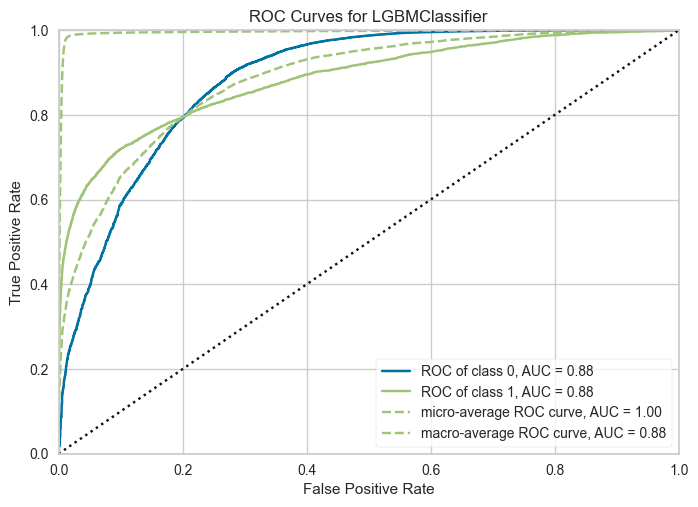

In [4]:
plot_model(best_model, plot="auc")

## Otimização de hipermarâmetros

In [7]:
# Hyperparameter tuning
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9852,0.8820,0.3294,0.7874,0.4645,0.4582,0.5036
1,0.9853,0.8783,0.3226,0.8106,0.4615,0.4555,0.5060
2,0.9858,0.8838,0.3441,0.8219,0.4851,0.4791,0.5264
3,0.9850,0.8720,0.3093,0.8022,0.4465,0.4404,0.4927
4,0.9851,0.8753,0.3195,0.7937,0.4556,0.4494,0.4980
5,0.9858,0.8878,0.3475,0.8216,0.4884,0.4824,0.5290
6,0.9855,0.8792,0.3328,0.8188,0.4732,0.4672,0.5166
7,0.9850,0.8783,0.3108,0.7927,0.4465,0.4403,0.4908
8,0.9851,0.8768,0.3065,0.8117,0.4450,0.4390,0.4934


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightG

## Avaliação do modelo

In [9]:
# Evaluate the model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Treinamento do modelo com os dados completos (treino e teste)

In [10]:
final_model = finalize_model(tuned_model)

## Salvando o modelo

In [11]:
save_model(final_model, './model/final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/l0/86s5dr1j4pd6kh_8_w9c68380000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['car', 'bicycle', 'trucks',
                                              'motorbike', 'bus', 'others',
                                              'animals', 'special_cargos',
                                              'tractors', 'utilities',
                                              'unharmed', 'slight_injury',
                                              'moderate_injury',
                                              'serious_injury', 'month', 'year',
                                              'dayofwee...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.2,
           